# Pizza Sales Analysis

## Introduction

In today’s competitive food industry, understanding customer preferences and optimizing menu offerings are crucial for any business. For a pizzeria, the ability to analyze ordering patterns, popular pizza variants, and revenue trends can significantly impact decision-making. With the rise of data-driven strategies, businesses can tailor their offerings to meet customer demands, manage inventory more effectively, and maximize profits.

In this project, I analyze a dataset containing detailed information on pizza orders, including order dates, times, pizza sizes, categories, ingredients, and pricing. By exploring this data, I aim to uncover insights that can help a pizzeria optimize its menu, pricing strategies, and marketing efforts.

### Business Question

1. What are the sales trends over time?
2. Which pizza is the most popoular?
3. Which pizza categories and sizes generate the most revenue?
4. What actionable strategies can be implemented to optimize the menu, pricing,and promotional efforts based on these insights?

## Data Preparation and Cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/rifqyadiyatma/Downloads/pizza_sales.csv')

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,1/1/2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,1/1/2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,1/1/2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,1/1/2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [3]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616.0,21348.0,ckn_alfredo_m,1.0,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617.0,21348.0,four_cheese_l,1.0,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618.0,21348.0,napolitana_s,1.0,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619.0,21349.0,mexicana_l,1.0,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620.0,21350.0,bbq_ckn_s,1.0,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [4]:
df.shape

(48620, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  float64
 1   order_id           48620 non-null  float64
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  float64
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.5+ MB


Because there is a different format in order_date, I need to change it so all values have same format

In [6]:
# Change order_date column type from object to datetime
df['order_date'] = df['order_date'].str.replace('-', '/')
df['order_date'] = pd.to_datetime(df['order_date'], dayfirst=True, errors='coerce')
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
# Change order_time type to datetime
df['order_time'] = pd.to_datetime(df['order_time'], format = '%H:%M:%S').dt.time
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


## Exploratory Data Analysis

### Order Trends

#### Daily Orders

In [21]:
daily_orders = df.groupby('order_date').size()
daily_orders

order_date
2015-01-01    161
2015-01-02    160
2015-01-03    154
2015-01-04    106
2015-01-05    121
             ... 
2015-12-27     87
2015-12-28    102
2015-12-29     77
2015-12-30     73
2015-12-31    171
Length: 358, dtype: int64

#### Monthly Orders

In [9]:
#Create new column for month period
df['year_month'] = df['order_date'].dt.to_period('M')

df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year_month
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01


In [10]:
monthly_orders = df.groupby('year_month').size()
monthly_orders

year_month
2015-01    4156
2015-02    3892
2015-03    4186
2015-04    4067
2015-05    4239
2015-06    4025
2015-07    4301
2015-08    4094
2015-09    3819
2015-10    3797
2015-11    4185
2015-12    3859
Freq: M, dtype: int64

In [11]:
# Revenue over time

monthly_revenue = df.groupby('year_month')['total_price'].sum()
monthly_revenue

year_month
2015-01    69793.30
2015-02    65159.60
2015-03    70397.10
2015-04    68736.80
2015-05    71402.75
2015-06    68230.20
2015-07    72557.90
2015-08    68278.25
2015-09    64180.05
2015-10    64027.60
2015-11    70395.35
2015-12    64701.15
Freq: M, Name: total_price, dtype: float64

#### Day of the week order trends

In [12]:
# create new column for day that customer ordered
df['day_of_week'] = df['order_date'].dt.day_name()
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,year_month,day_of_week
0,1.0,1.0,hawaiian_m,1.0,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,2015-01,Thursday
1,2.0,2.0,classic_dlx_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,2015-01,Thursday
2,3.0,2.0,five_cheese_l,1.0,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza,2015-01,Thursday
3,4.0,2.0,ital_supr_l,1.0,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,2015-01,Thursday
4,5.0,2.0,mexicana_m,1.0,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza,2015-01,Thursday


In [13]:
# group orders by day of the week to see what day is the busiest
orders_by_day = df.groupby(df['day_of_week']).size().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

orders_by_day

day_of_week
Monday       6369
Tuesday      6753
Wednesday    6797
Thursday     7323
Friday       8106
Saturday     7355
Sunday       5917
dtype: int64

#### Peak Times

In [27]:
df['order_hour'] = pd.to_datetime(df['order_time'], format='%H:%M:%S').dt.hour
peak_times = df.groupby('order_hour').size()
peak_times

order_hour
9        4
10      17
11    2672
12    6543
13    6203
14    3521
15    3170
16    4185
17    5143
18    5359
19    4350
20    3487
21    2528
22    1370
23      68
dtype: int64

### Pizza Popularity

In [15]:
popular_pizza = df.groupby(df['pizza_name'], as_index = False).agg(total_orders = ('quantity', 'sum'),
                                                                  total_amount = ('total_price', 'sum')).sort_values(
                                                                                                        'total_amount', ascending = False)
# .size().sort_values(ascending = False)
popular_pizza

,pizza_name,total_orders,total_amount
30,The Thai Chicken Pizza,2371.0,43434.25
0,The Barbecue Chicken Pizza,2432.0,42768.00
4,The California Chicken Pizza,2370.0,41409.50
7,The Classic Deluxe Pizza,2453.0,38180.50
26,The Spicy Italian Pizza,1924.0,34831.25
25,The Southwest Chicken Pizza,1917.0,34705.75
14,The Italian Supreme Pizza,1884.0,33476.75
12,The Hawaiian Pizza,2422.0,32273.25
9,The Four Cheese Pizza,1902.0,32265.70
23,The Sicilian Pizza,1938.0,30940.50


In [16]:
# Popular pizza category

pizza_category = df.groupby(df['pizza_category'], as_index = False).agg(total_orders = ('quantity', 'sum'),
                                                                       total_amount = ('total_price', 'sum')).sort_values(
                                                                                                                'total_amount', ascending = False
                                                                                                               )
pizza_category

,pizza_category,total_orders,total_amount
1,Classic,14888.0,220053.10
2,Supreme,11987.0,208197.00
0,Chicken,11050.0,195919.50
3,Veggie,11649.0,193690.45


In [17]:
pizza_size = df.groupby('pizza_size', as_index = False).agg(total_orders = ('quantity', 'sum'),
                                                            total_amount = ('total_price', 'sum'))
pizza_size

,pizza_size,total_orders,total_amount
0,L,18956.0,375318.70
1,M,15635.0,249382.25
2,S,14403.0,178076.50
3,XL,552.0,14076.00
4,XXL,28.0,1006.60


### Customer

#### Top Spending Customer

Because customer Id is not in this dataset, I use order Id instead to see which one spend the most

In [54]:
# Top Spending Customer
customer_value = df.groupby('order_id')['total_price'].sum().sort_values(ascending=False)
customer_value

order_id
18845.0    444.20
10760.0    417.15
1096.0     285.15
6169.0     284.00
740.0      280.95
            ...  
17455.0      9.75
17456.0      9.75
20492.0      9.75
20284.0      9.75
15300.0      9.75
Name: total_price, Length: 21350, dtype: float64

#### Average Customer Spend

In [59]:
df['spend_value'] = df.groupby('order_id')['total_price'].transform('sum')
avg_value = df['order_value'].mean()

avg_value

60.69923796791444

In [61]:
df['order_value'] = df.groupby('order_id')['quantity'].transform('sum')
avg_order_value = df['order_value'].mean()

avg_order_value

3.678774167009461

## Data Visualisation

### Order Trends

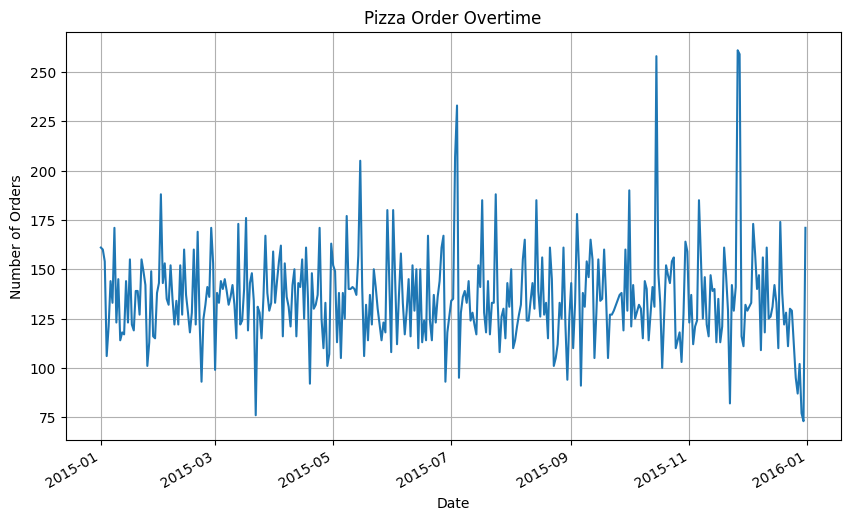

In [22]:
plt.figure(figsize=(10, 6))
daily_orders.plot(kind='line', title='Pizza Order Overtime')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

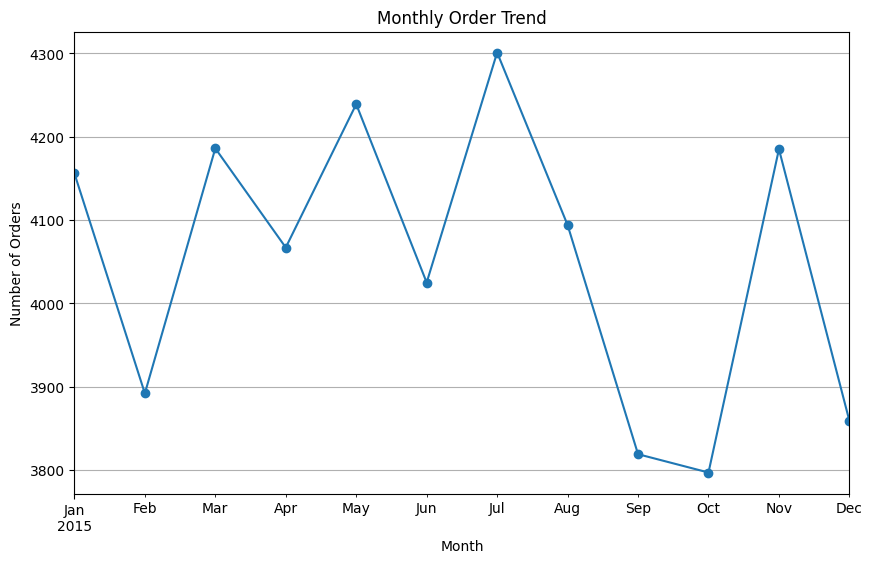

In [23]:
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o', title='Monthly Order Trend')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.grid(True)
plt.show()

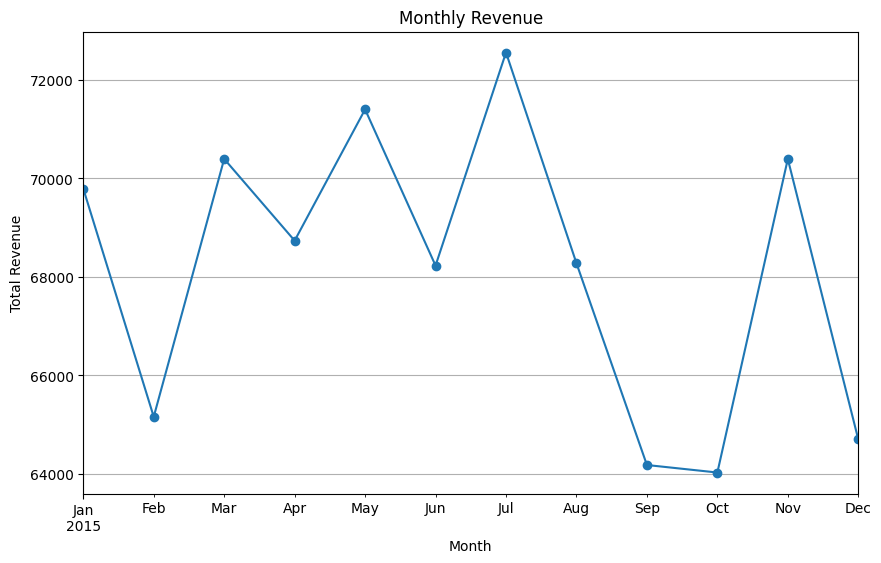

In [24]:
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

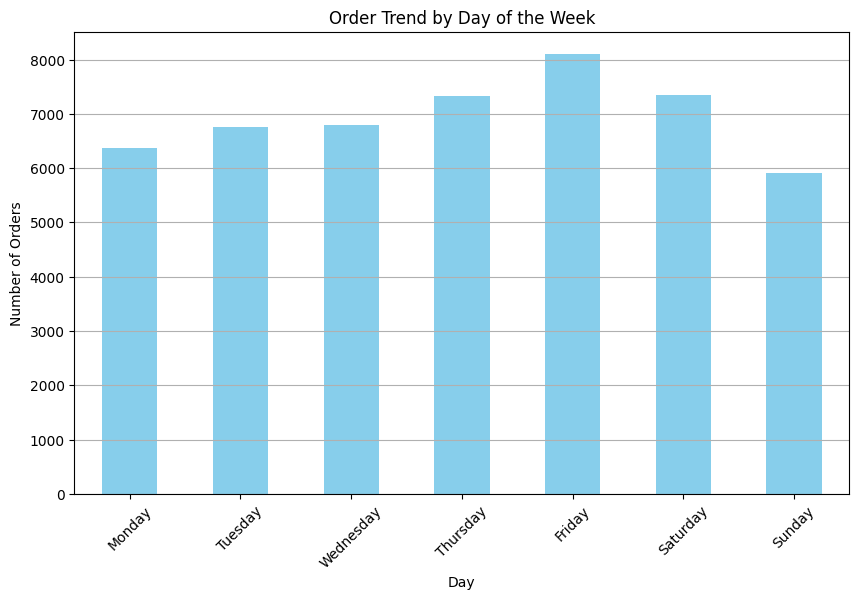

In [25]:
plt.figure(figsize=(10, 6))
orders_by_day.plot(kind='bar', color='skyblue', title='Order Trend by Day of the Week')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

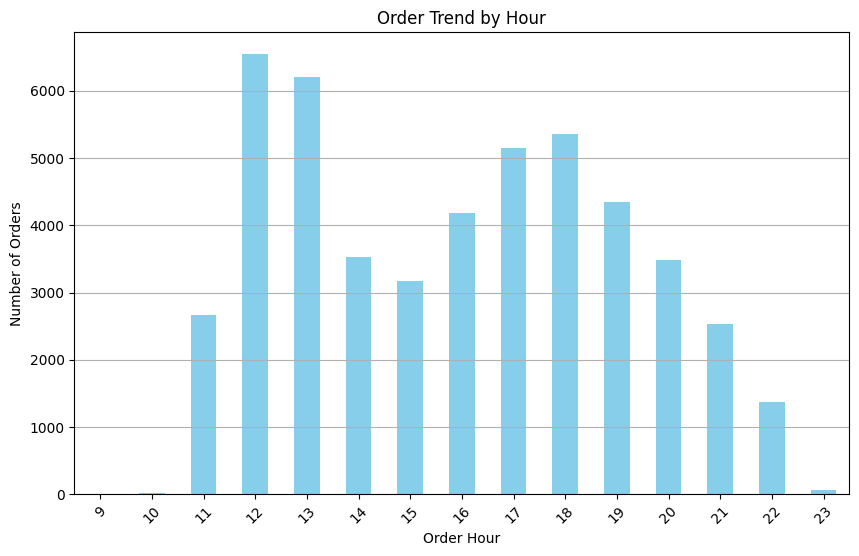

In [28]:
plt.figure(figsize=(10, 6))
peak_times.plot(kind='bar', color='skyblue', title='Order Trend by Hour')
plt.xlabel('Order Hour')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Pizza

In [41]:
# Top 10 pizza by order

top_pizza = popular_pizza.nlargest(10, 'total_orders')

top_pizza

,pizza_name,total_orders,total_amount
7,The Classic Deluxe Pizza,2453.0,38180.50
0,The Barbecue Chicken Pizza,2432.0,42768.00
12,The Hawaiian Pizza,2422.0,32273.25
20,The Pepperoni Pizza,2418.0,30161.75
30,The Thai Chicken Pizza,2371.0,43434.25
4,The California Chicken Pizza,2370.0,41409.50
23,The Sicilian Pizza,1938.0,30940.50
26,The Spicy Italian Pizza,1924.0,34831.25
25,The Southwest Chicken Pizza,1917.0,34705.75
1,The Big Meat Pizza,1914.0,22968.00


Text(0, 0.5, 'Total Orders')

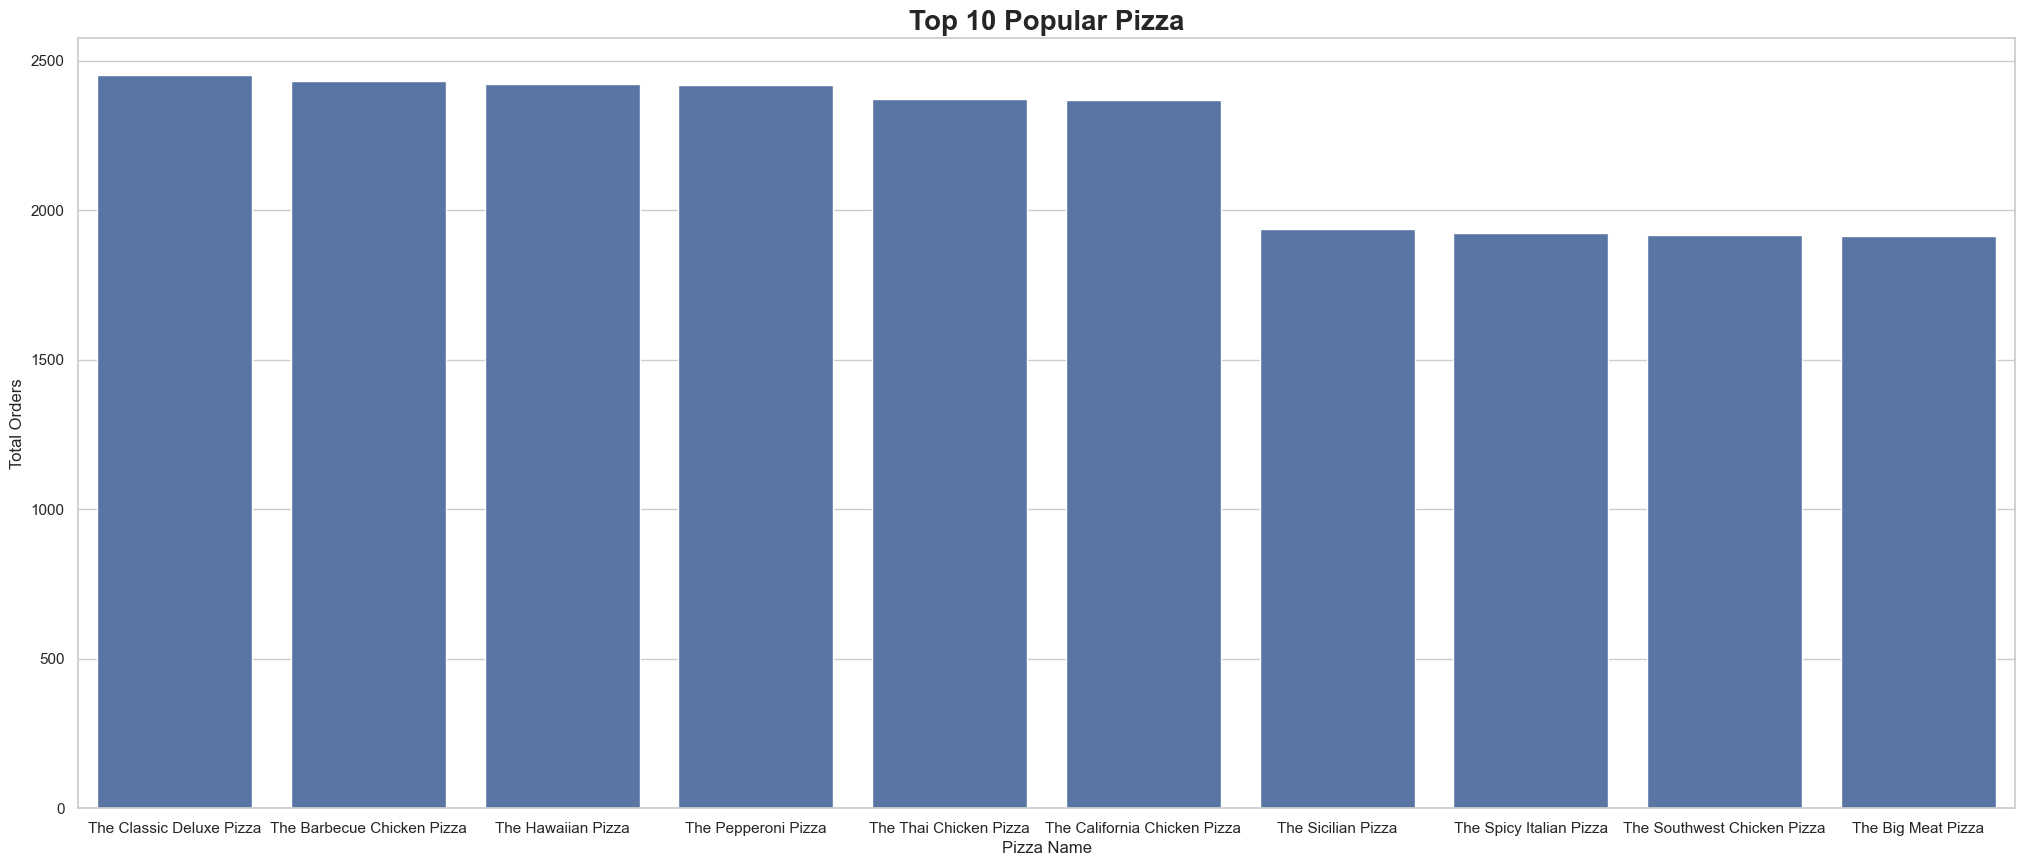

In [42]:
plt.figure(figsize = (25, 10))
sns.barplot(data = top_pizza, x = 'pizza_name', y = 'total_orders', order = top_pizza['pizza_name'])
sns.set(style = 'whitegrid')
plt.title('Top 10 Popular Pizza', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pizza Name')
plt.ylabel('Total Orders')

In [47]:
top_revenue = popular_pizza.nlargest(10, 'total_amount')


Text(0, 0.5, 'Total Orders')

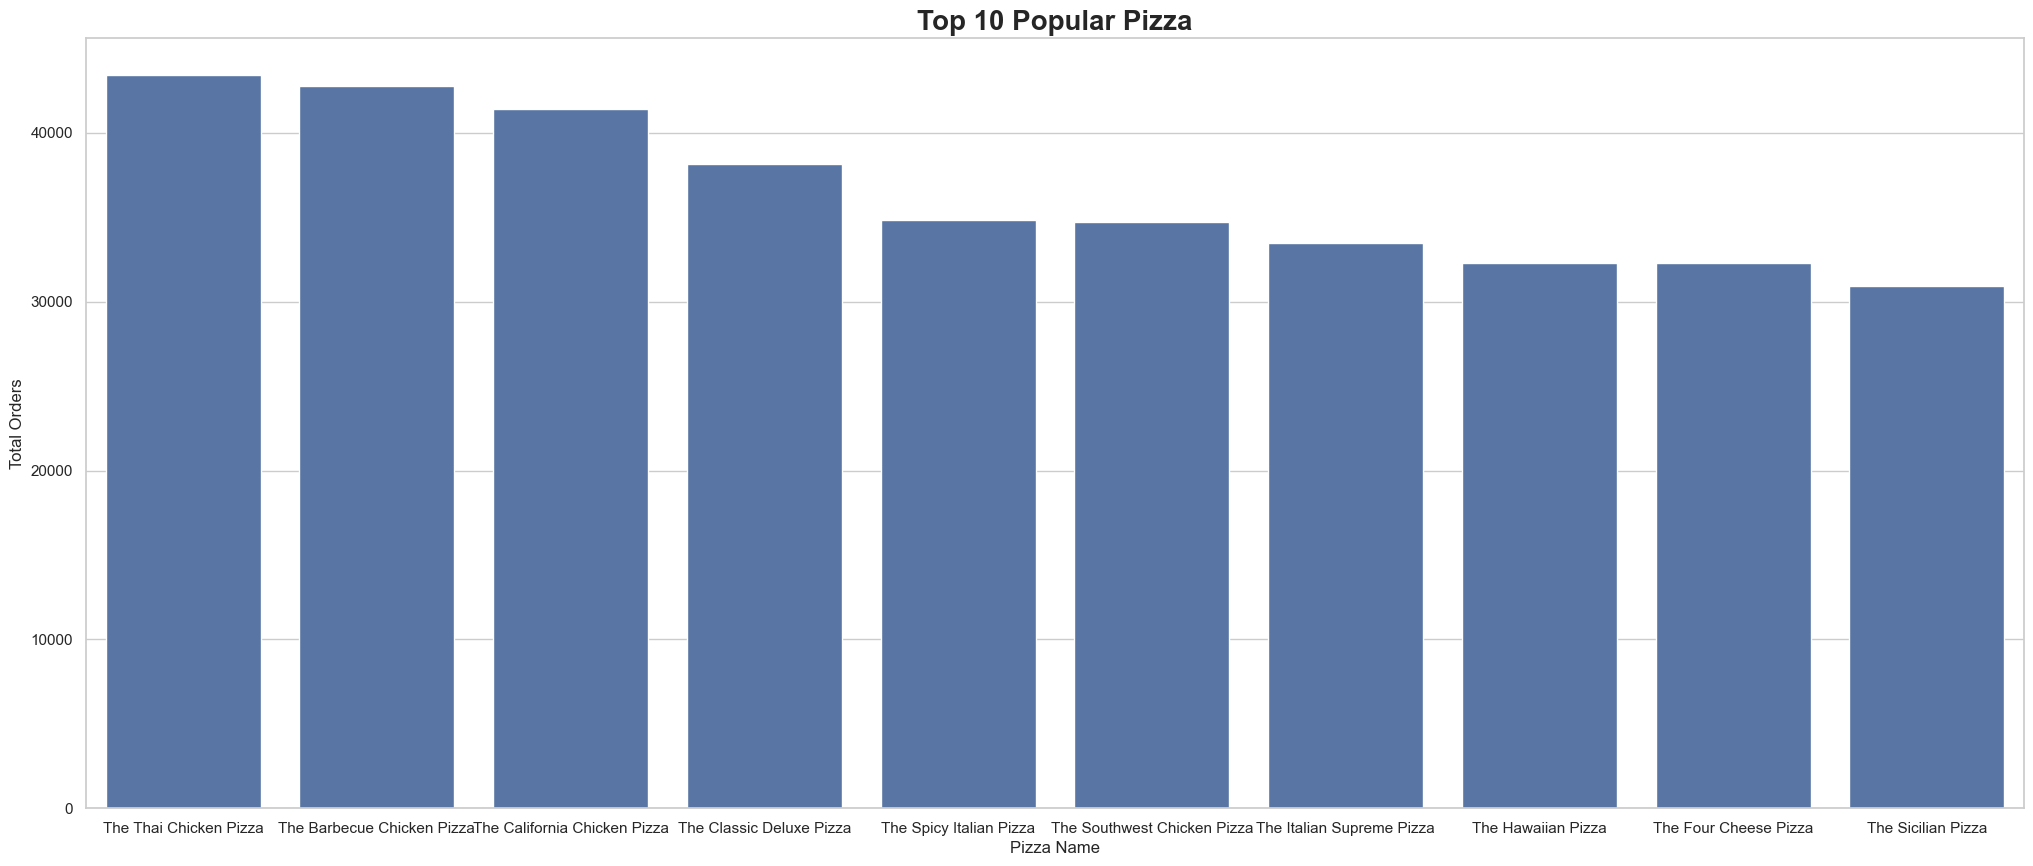

In [52]:
plt.figure(figsize = (25, 10))
sns.barplot(data = top_revenue, x = 'pizza_name', y = 'total_amount', order = top_revenue['pizza_name'])
sns.set(style = 'whitegrid')
plt.title('Top 10 Popular Pizza', fontsize = 20, fontweight = 'bold')
plt.xlabel('Pizza Name')
plt.ylabel('Total Orders')

Text(0, 0.5, 'Total Orders')

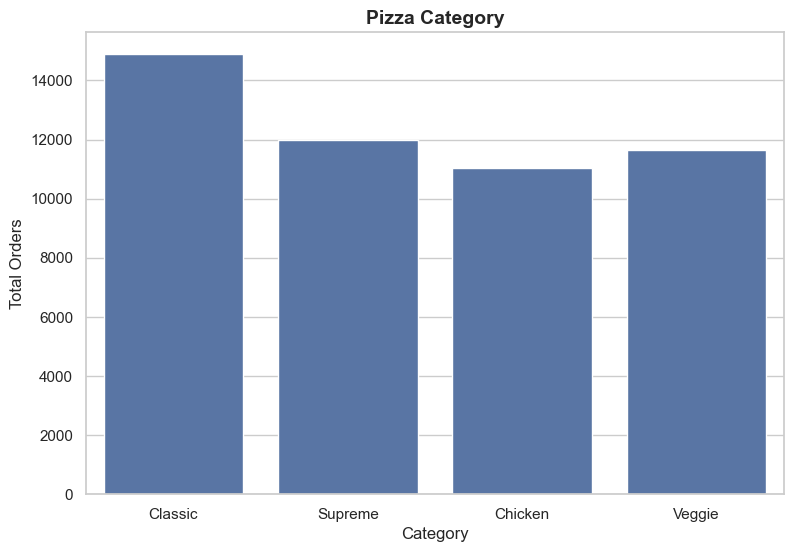

In [46]:
plt.figure(figsize = (9, 6))
sns.barplot(data = pizza_category, x = 'pizza_category', y = 'total_orders', order = pizza_category['pizza_category'])
sns.set(style = 'whitegrid')
plt.title('Pizza Category', fontsize = 14, fontweight = 'bold')
plt.xlabel('Category')
plt.ylabel('Total Orders')
